# Task 4a EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from matplotlib_venn import venn2
import re
from wordcloud import WordCloud
import ast
from collections import Counter

df = pd.read_csv('ct_train_data.tsv', sep='\t')
display(df)
df['labels'] = df['labels'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

FileNotFoundError: [Errno 2] No such file or directory: 'ct_train_data.tsv'

### Number of Science and non-science-related tweets

In [ ]:
science_count = df['labels'].apply(lambda x: x == [0.0, 0.0, 0.0]).sum()
nonscience_count = df['labels'].apply(lambda x: x != [0.0, 0.0, 0.0]).sum()
total_rows = len(df)
science_percentages = [
    (science_count / total_rows) * 100,
    (nonscience_count / total_rows) * 100
]

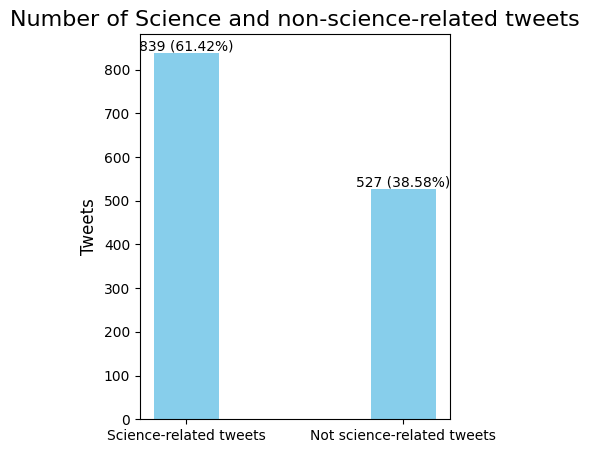

In [ ]:
plt.figure(figsize=(4, 5))
science_categories = ['Science-related tweets', 'Not science-related tweets']
science_counts = [science_count, nonscience_count]
plt.bar(science_categories, science_counts, color='skyblue', width=0.3)

plt.title('Number of Science and non-science-related tweets', fontsize=16)
#plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
for i, (science_count, science_percentage) in enumerate(zip(science_counts, science_percentages)):
    plt.text(
        i, science_count + 5,
        f"{science_count} ({science_percentage:.2f}%)",
        ha='center', fontsize=10
    )
plt.show()

### Number of Science-related Tweets in Each Category

In [ ]:

cat1_count = df['labels'].apply(lambda x: int(x[0]) == 1).sum()
cat2_count = df['labels'].apply(lambda x: int(x[1]) == 1).sum()
cat3_count = df['labels'].apply(lambda x: int(x[2]) == 1).sum()
science_total = cat1_count + cat2_count + cat3_count
cat_percentages = [
    (cat1_count / science_total) * 100,
    (cat2_count / science_total) * 100,
    (cat3_count / science_total) * 100
]

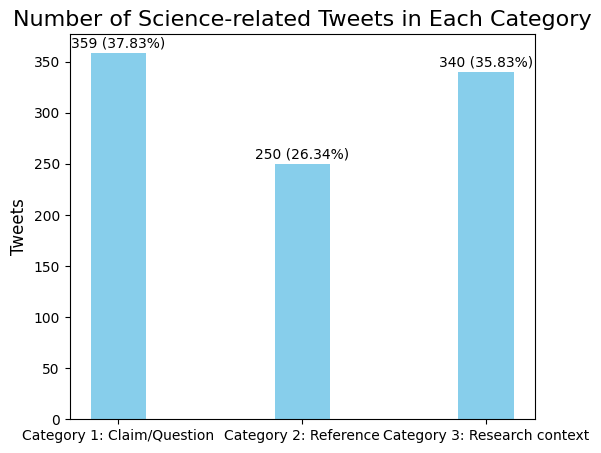

In [ ]:
plt.figure(figsize=(6, 5))
cat_categories = ['Category 1: Claim/Question', 'Category 2: Reference', 'Category 3: Research context']
cat_counts = [cat1_count, cat2_count, cat3_count]
plt.bar(cat_categories, cat_counts, color='skyblue', width=0.3)

plt.title('Number of Science-related Tweets in Each Category', fontsize=16)
#plt.xlabel('Categories', fontsize=12)
plt.ylabel('Number of Tweets', fontsize=12)
for i, (cat_count, cat_percentage) in enumerate(zip(cat_counts, cat_percentages)):
    plt.text(
        i, cat_count + 5,
        f"{cat_count} ({cat_percentage:.2f}%)",
        ha='center', fontsize=10
    )
plt.show()

### Overlap of Tweets Among Categories

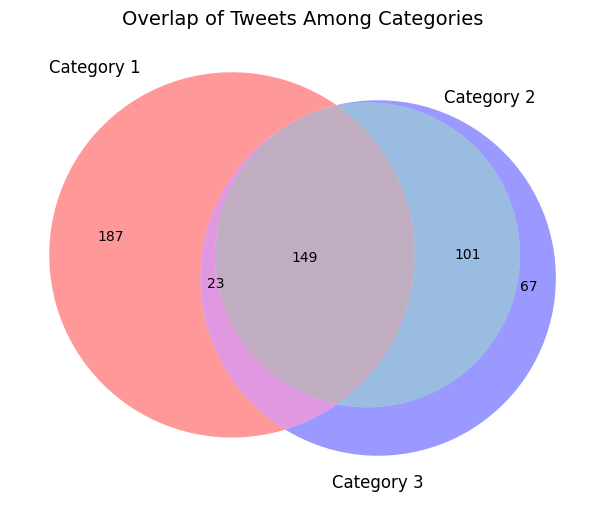

In [ ]:
cat1_set = set(df[df['labels'].apply(lambda x: x[0] == 1)].index)
cat2_set = set(df[df['labels'].apply(lambda x: x[1] == 1)].index)
cat3_set = set(df[df['labels'].apply(lambda x: x[2] == 1)].index)

plt.figure(figsize=(8, 6))
venn = venn3([cat1_set, cat2_set, cat3_set], ('Category 1', 'Category 2', 'Category 3'))
plt.title("Overlap of Tweets Among Categories", fontsize=14)
plt.show()


*   149 tweets belonged to all three categories
*   172 tweets shared between Category 1 and 3, in which 23 of those tweets belonged to both Category 1 and 3 but not Category 2.
*   All 250 tweets in category 2 was in Category 3.


### Category 2 Tweets


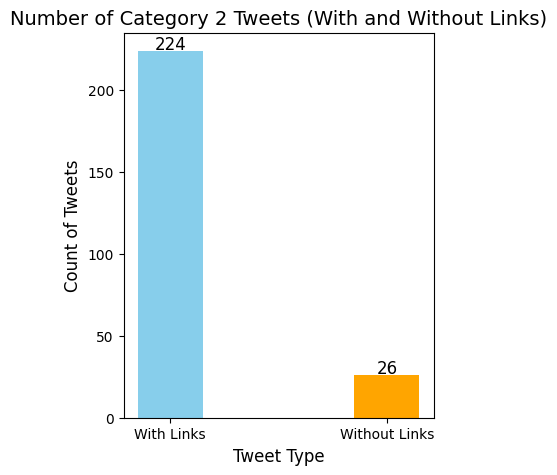

In [ ]:
cat2_tweets = df[df['labels'].apply(lambda x: x[1] == 1)]

# Separate tweets with and without links
cat2_tweets_with_links = cat2_tweets[cat2_tweets['text'].apply(lambda x: bool(re.search(r"http[s]?://", x)))]
cat2_tweets_without_links = cat2_tweets[~cat2_tweets['text'].apply(lambda x: bool(re.search(r"http[s]?://", x)))]

# Counts
count_with_links = len(cat2_tweets_with_links)
count_without_links = len(cat2_tweets_without_links)

# Bar graph
categories = ['With Links', 'Without Links']
counts = [count_with_links, count_without_links]

plt.figure(figsize=(4, 5))
bars = plt.bar(categories, counts, color=['skyblue', 'orange'], width = 0.3)

# Add counts on top of the bars
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, str(count), ha='center', fontsize=12)

plt.title('Number of Category 2 Tweets (With and Without Links)', fontsize=14)
plt.ylabel('Count of Tweets', fontsize=12)
plt.xlabel('Tweet Type', fontsize=12)
plt.show()

In [ ]:
tweets_links = df[df['text'].apply(lambda x: bool(re.search(r"http[s]?://", x)))]
cat2_tweets_with_links = tweets_links[tweets_links['labels'].apply(lambda x: x[1] == 1)]
cat2_links = cat2_tweets_with_links['text'].apply(
    lambda x: " ".join(re.findall(r"http[s]?://\S+", x)).replace("http://", "").replace("https://", "")
)
non_cat2_tweets = tweets_links[~tweets_links['labels'].apply(lambda x: x[1] == 1)]
non_cat2_links = non_cat2_tweets['text'].apply(
    lambda x: " ".join(re.findall(r"http[s]?://\S+", x)).replace("http://", "").replace("https://", "")
)

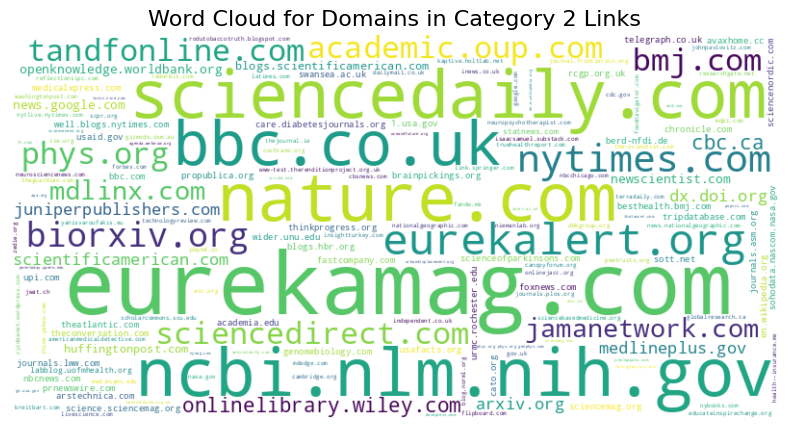

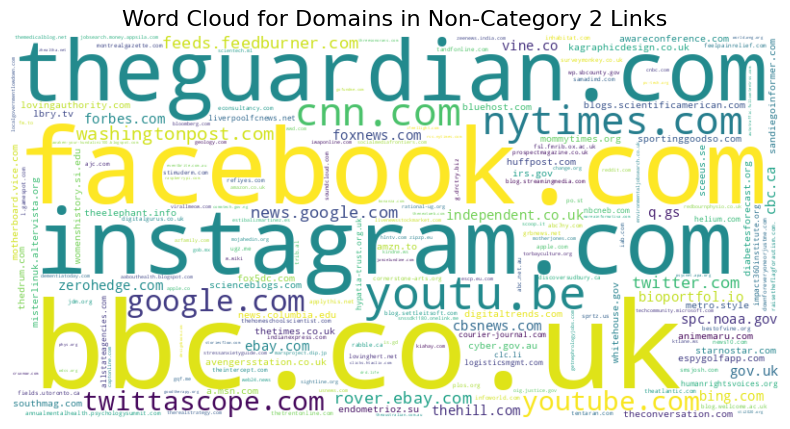

Top 20 Shared Domains (Counts Across Both Categories):
bbc.co.uk: Total = 16, Category 2 = 5, Non-Category 2 = 11
nytimes.com: Total = 9, Category 2 = 4, Non-Category 2 = 5
theguardian.com: Total = 8, Category 2 = 1, Non-Category 2 = 7
nature.com: Total = 7, Category 2 = 6, Non-Category 2 = 1
google.com: Total = 6, Category 2 = 1, Non-Category 2 = 5
washingtonpost.com: Total = 5, Category 2 = 1, Non-Category 2 = 4
news.google.com: Total = 5, Category 2 = 2, Non-Category 2 = 3
phys.org: Total = 4, Category 2 = 3, Non-Category 2 = 1
cbc.ca: Total = 4, Category 2 = 2, Non-Category 2 = 2
tandfonline.com: Total = 4, Category 2 = 3, Non-Category 2 = 1
cbsnews.com: Total = 3, Category 2 = 1, Non-Category 2 = 2
independent.co.uk: Total = 3, Category 2 = 1, Non-Category 2 = 2
gov.uk: Total = 3, Category 2 = 1, Non-Category 2 = 2
forbes.com: Total = 3, Category 2 = 1, Non-Category 2 = 2
blogs.scientificamerican.com: Total = 3, Category 2 = 2, Non-Category 2 = 1
foxnews.com: Total = 3, Category 2

In [ ]:
def extract_domains(urls):
    domains = []
    for url in urls:
        # Remove protocols (http, https) and "www"
        url = url.replace("http://", "").replace("https://", "").replace("www.", "")
        domain = url.split('/')[0]  # Extract everything before the first "/"
        domains.append(domain.lower())
    return Counter(domains)

# Extract domains for cat2_links and non_cat2_links
cat2_domains = extract_domains(cat2_links)
non_cat2_domains = extract_domains(non_cat2_links)

# Shared and unique domains
shared_domains = set(cat2_domains.keys()).intersection(set(non_cat2_domains.keys()))
unique_to_cat2 = {domain: count for domain, count in cat2_domains.items() if domain not in shared_domains}
unique_to_non_cat2 = {domain: count for domain, count in non_cat2_domains.items() if domain not in shared_domains}

# Create word clouds for cat2 and non-cat2 domains
cat2_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(cat2_domains)
non_cat2_wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(non_cat2_domains)

# Display word clouds
plt.figure(figsize=(10, 5))
plt.imshow(cat2_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Domains in Category 2 Links", fontsize=16)
plt.show()
print("\n")
plt.figure(figsize=(10, 5))
plt.imshow(non_cat2_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Domains in Non-Category 2 Links", fontsize=16)
plt.show()

top_20_shared = sorted(
    [(domain, cat2_domains[domain] + non_cat2_domains[domain]) for domain in shared_domains],
    key=lambda x: x[1], reverse=True
)[:20]
top_20_unique_cat2 = sorted(unique_to_cat2.items(), key=lambda x: x[1], reverse=True)[:20]
top_20_unique_non_cat2 = sorted(unique_to_non_cat2.items(), key=lambda x: x[1], reverse=True)[:20]
print("Top 20 Shared Domains (Counts Across Both Categories):")
for domain, count in top_20_shared:
    print(f"{domain}: Total = {count}, Category 2 = {cat2_domains[domain]}, Non-Category 2 = {non_cat2_domains[domain]}")
print("\nTop 20 Unique Domains in Category 2:")
for domain, count in top_20_unique_cat2:
    print(f"{domain}: {count}")
print("\nTop 20 Unique Domains in Non-Category 2:")
for domain, count in top_20_unique_non_cat2:
    print(f"{domain}: {count}")